In [61]:
import numpy as np     
import sklearn 
import pandas as pd        
import seaborn as sns     
import matplotlib.pyplot as plt  


In [ ]:
#قراءة ملف csv من على سطح المكتب 
df = pd.read_csv(r'C:\Users\AhmadAlmustafa\OneDrive\Desktop\data.csv')
#عرض اول 5 صفوف 
df.head().T 

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [63]:
# تعطي معلومات عن البيانات وعدد القيم الغير فارغة 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
# حذف عمود ID لانه معرف لا يفيد في عملية النمذجة 
df.drop('customerID',axis=1,inplace=True)
df.head().T
# ....تعطي وصف للبيانات مثل المتوسط,الانحراق المعياري ,الحد الادنى,الحد الاقصى,
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [65]:
# تعطي وصف عن عمود Totalcharges
df.TotalCharges.describe()



count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [ ]:
# يوجد في المعمود Totalcharges مسافات تريد ان تخلص منها 
df[df['TotalCharges']==' ']


In [66]:
#تحويل العمود الى ارقام والقيم مثل المسافات الغير قابلة للتحويل تصبح NaN
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')



In [10]:
#التحقق من العمود 
len(df[df['TotalCharges']==' '])


0

In [67]:
# هذا الاسطر كانت تحتوي على قيم فارغة تم استبدالها ب Nan
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [68]:
#معرفة عدد القيم الفارغة في كل عمود 
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

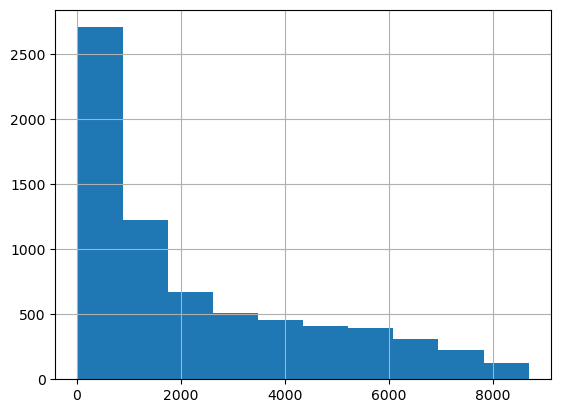

In [69]:

df['TotalCharges'].hist()


In [70]:
#ملئ القيم الفارغة باستحدام الوسيط median
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())



In [24]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [71]:
#جعل احرف اسماء الاعمدة صغيرة 
df.columns=df.columns.str.lower()


In [72]:
#عرض اسماء الاعمدة 
df.columns



Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [73]:
#تحويل عمود الهدف من نصي الى ارقام 
df.churn=(df.churn=='Yes').astype(int)



In [74]:
# عرض  عمود الهدف 
df.churn


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [75]:
#عرض كم خانة  صفرية وكم خانة  تمتلك القيمة 1
df.churn.value_counts()


churn
0    5174
1    1869
Name: count, dtype: int64

In [76]:

# نسبة العملاء المتوقفين ونسبة العملاء الغير متوقفين 
df.churn.value_counts(normalize=True)
# القيمة 0 تعني غير متوقفين 
# القيمة 1 تعني متوقفين 




churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [77]:
#EDA :Eploratory Data Analysis التحليل الاستكشافي للبيانات 
# تحويل عمود seniorcitizen (كبير السن) من عدد الى object 
# الغاية من تحويله الى object من اجل تصنيفه الى فئات 
df['seniorcitizen']=df['seniorcitizen'].astype('object')


In [78]:

#استخراج الاعمدة التي نوعها object لكي يتم تصنيفها الى فئات 
df.select_dtypes(include=['object']).columns



Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [79]:
#تصنيف الاعمد التي نوعها objects الى فئات من اجل تقسيم البيانات الى نوعين 
categorical=list(df.select_dtypes(include=['object']).columns)
# قسم objects 
# قسم numerical اعداد 

#تصنيف الاعمدة ذات النوع الرقمي الى فئة عددية 
numerical=list(df.select_dtypes(include=['number']).columns)


# تم حذف عمود الهدف لاننا نح نريد تنبؤه
# ليس من المنطق ان يتم تدريبه
numerical.remove('churn')

# تقوم بإيجاد عدد القيم الفريدة في كل عمود من اعمدة الفئوية 
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [80]:
# عرضا اسماء  الاعمدة الرقمية 
numerical


['tenure', 'monthlycharges', 'totalcharges']

In [81]:
# يقوم بإيجاد المتوسط الحسابي للعملاء الذين توقفو عن الخدمة 
# 0  لم يتوقفو عن الخدمة 
# 1 توقفو عن الخدمة 
global_mean=df.churn.mean()

# تقريب النسبة لعددين 
round(global_mean,2)

0.27

In [82]:
# ايجاد متوسط  توقف الرجال ومتوسط توقف النساء 

churn_gender=df.groupby('gender').churn.mean()


churn_gender

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

In [83]:
# ايجاذ متوسط العملاء الذين لديهم شريك والذين لا يملكون شريك 
# ايجاد متوسك توقف لكل فئة من هذا الصنف
churn_partner=df.groupby('partner').churn.mean()
churn_partner

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [84]:

# حساب باستخدام تقنية risk ratio نسبة توقف النساء والرجال 
gender_risk=churn_gender/global_mean
gender_risk

gender
Female    1.014466
Male      0.985807
Name: churn, dtype: float64

In [85]:

partner_risk=churn_partner/global_mean
partner_risk

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [86]:
from IPython.display import display

for feature in categorical:
    
    df_group=df.groupby(by=feature).churn.agg(['mean'])
    df_group['diff']=df_group['mean']- global_mean
    df_group['risk']=df_group['mean']-global_mean
    
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.269209,0.003839,0.003839
Male,0.261603,-0.003766,-0.003766


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.029308,-0.029308
1,0.416813,0.151443,0.151443


,mean,diff,risk
partner,,,
No,0.329580,0.064210,0.064210
Yes,0.196649,-0.068721,-0.068721


,mean,diff,risk
dependents,,,
No,0.312791,0.047422,0.047422
Yes,0.154502,-0.110868,-0.110868


,mean,diff,risk
phoneservice,,,
No,0.249267,-0.016103,-0.016103
Yes,0.267096,0.001726,0.001726


,mean,diff,risk
multiplelines,,,
No,0.250442,-0.014927,-0.014927
No phone service,0.249267,-0.016103,-0.016103
Yes,0.286099,0.020729,0.020729


,mean,diff,risk
internetservice,,,
DSL,0.189591,-0.075779,-0.075779
Fiber optic,0.418928,0.153558,0.153558
No,0.074050,-0.191320,-0.191320


,mean,diff,risk
onlinesecurity,,,
No,0.417667,0.152297,0.152297
No internet service,0.074050,-0.191320,-0.191320
Yes,0.146112,-0.119258,-0.119258


,mean,diff,risk
onlinebackup,,,
No,0.399288,0.133918,0.133918
No internet service,0.074050,-0.191320,-0.191320
Yes,0.215315,-0.050055,-0.050055


,mean,diff,risk
deviceprotection,,,
No,0.391276,0.125906,0.125906
No internet service,0.074050,-0.191320,-0.191320
Yes,0.225021,-0.040349,-0.040349


,mean,diff,risk
techsupport,,,
No,0.416355,0.150985,0.150985
No internet service,0.074050,-0.191320,-0.191320
Yes,0.151663,-0.113706,-0.113706


,mean,diff,risk
streamingtv,,,
No,0.335231,0.069861,0.069861
No internet service,0.074050,-0.191320,-0.191320
Yes,0.300702,0.035332,0.035332


,mean,diff,risk
streamingmovies,,,
No,0.336804,0.071434,0.071434
No internet service,0.074050,-0.191320,-0.191320
Yes,0.299414,0.034044,0.034044


,mean,diff,risk
contract,,,
Month-to-month,0.427097,0.161727,0.161727
One year,0.112695,-0.152675,-0.152675
Two year,0.028319,-0.237051,-0.237051


,mean,diff,risk
paperlessbilling,,,
No,0.163301,-0.102069,-0.102069
Yes,0.335651,0.070281,0.070281


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.167098,-0.098271,-0.098271
Credit card (automatic),0.152431,-0.112939,-0.112939
Electronic check,0.452854,0.187484,0.187484
Mailed check,0.191067,-0.074303,-0.074303


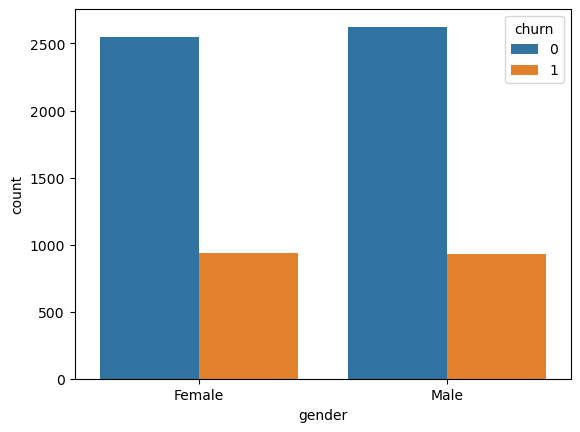

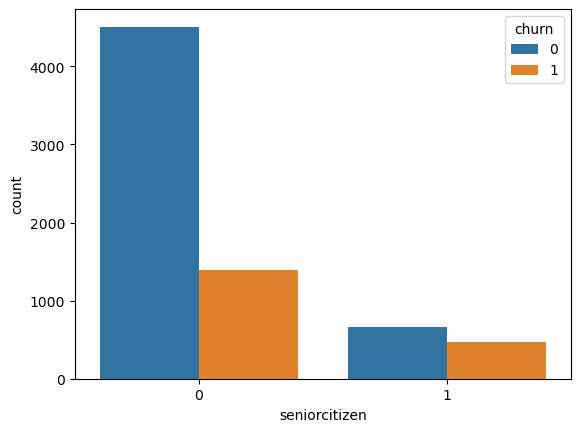

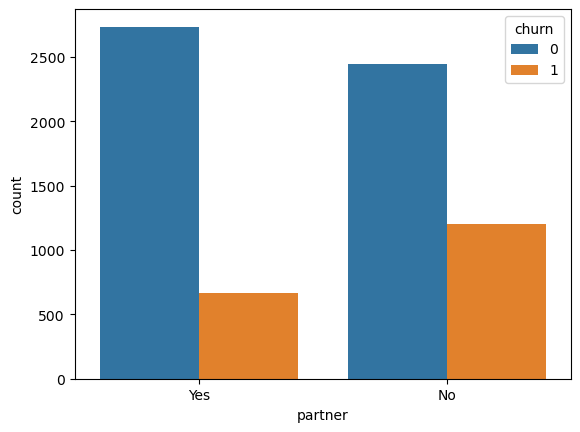

In [60]:
# رسم محطط بياني لاول ثلاث اعمدة 
#يعرض لكل فئة من الفئات (مثل Male/Female أو Yes/No):
#كم عدد العملاء الذين توقفوا عن الخدمة (churn=1).
#كم عدد العملاء الذين استمروا (churn=0).
for feature in categorical[:3]:
    
    _=sns.countplot(x=feature,hue='churn',data=df)
    
    plt.show()

In [87]:
#تقسيم البيانات من اجل التدريب والاختبار 
#في هذا الجزء من الكود، قمنا بتقسيم البيانات الكاملة إلى ثلاث مجموعات رئيسية:
#بيانات التدريب (Training set - 64%): تُستخدم لتعليم النموذج الأنماط من البيانات.
#بيانات التحقق (Validation set - 16%): تُستخدم لاختبار النموذج أثناء تدريبه وضبط أدائه.
#بيانات الاختبار (Testing set - 20%): تُستخدم لتقييم دقة النموذج النهائية على بيانات لم يرها من قبل.
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)

print("Training Data Size: ", df_train.shape)

print("Validation Data Size: ", df_valid.shape)

print("Testing Data Size: ", df_test.shape)


Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


In [88]:
# Applying one hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer


ohe = OneHotEncoder(drop='first') # انشاء كائن من one host encoder 

# تطبيق OneHotEncoder باستحدام make_column_transformer
transformer = make_column_transformer((ohe, categorical), remainder='passthrough', verbose_feature_names_out=False)
                                     


#ادريب المحول على بيناتات التدريب فقط 
train_enc = transformer.fit_transform(df_train)

df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())

df_train_enc


,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,30.0,19.70,625.05,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,23.0,83.75,1849.95,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.0,95.80,1346.30,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,19.70,1051.90,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,63.0,98.00,6218.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,52.0,80.85,4079.55,0.0
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,18.0,25.15,476.80,0.0
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,90.00,190.05,1.0
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,27.0,24.50,761.95,0.0


In [92]:
x_train=df_train_enc.drop('churn',axis=1)

y_train=df_train_enc['churn']



In [94]:
valid_enc=transformer.transform(df_valid)

df_valid_enc=pd.DataFrame(valid_enc,columns=transformer.get_feature_names_out())

x_valid=df_valid_enc.drop('churn',axis=1)

y_valid=df_valid_enc['churn']


test_enc=transformer.transform(df_test)

df_test_enc=pd.DataFrame(test_enc,columns=transformer.get_feature_names_out())

x_test=df_test_enc.drop('churn',axis=1)

y_test=df_test_enc['churn']



In [95]:

from sklearn.preprocessing import StandardScaler #نستورد الكائن StandardScaler من مكتبة scikit-learn
#هذا الكائن مسؤول عن تقييس/توحيد البيانات الرقمية

scaler = StandardScaler() # انشاء كائن من StandardScaler


scaler.fit_transform(df_train[numerical]) 


array([[-0.08151035, -1.48282956, -0.71846292],
       [-0.36657522,  0.64606159, -0.17334564],
       [-0.7330872 ,  1.04657898, -0.39748501],
       ...,
       [-1.22176983,  0.85379883, -0.91205098],
       [-0.20368101, -1.32328737, -0.65753831],
       [-0.93670496,  0.54967152, -0.66212211]])

In [96]:
# Transformers
def preprocess(df_train, df_valid, df_test, num, cat):
    
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    
    scaler = StandardScaler()
    

    transformer = make_column_transformer((scaler, num), (ohe, cat), remainder='passthrough',verbose_feature_names_out=False)
                                          
                                        
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    
    X_valid = transformer.transform(df_valid[cat+num])
    
    X_test = transformer.transform(df_test[cat+num])
    
    columns=transformer.get_feature_names_out()
    
   
    return X_train , X_valid, X_test, columns
    

X_train , X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)
X_train

array([[-0.08151035, -1.48282956, -0.71846292, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17334564, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.39748501, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91205098, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.65753831, ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66212211, ...,  0.        ,
         1.        ,  0.        ]])

In [97]:
y_train = df_train['churn']

y_valid = df_valid['churn']

y_test = df_test['churn']

########################################################################
# Modeling
from sklearn.linear_model import LogisticRegression 

# LogisticRegression :نموذج انحدار لوجستي لتوقع توقف العميل 

model_1 = LogisticRegression(solver='liblinear', random_state=1)


model_1.fit(X_train, y_train) # training weights



LogisticRegression(random_state=1, solver='liblinear')

In [98]:
model_1.coef_ # مصفوفة الاوزان التي تعلمها النموذج لكل عمود في البيانات



array([[-1.5286483 ,  0.01641739,  0.76236858, -0.02288414,  0.16696821,
         0.07964104, -0.07104243, -0.783462  , -0.11831272,  0.24086619,
         0.7485746 , -0.11327009, -0.11327009, -0.44411525, -0.11327009,
        -0.10953334, -0.11327009, -0.10860113, -0.11327009, -0.38874398,
        -0.11327009,  0.13026704, -0.11327009,  0.20739002, -0.67923357,
        -1.40358883,  0.34322234,  0.05214293,  0.20338988,  0.03399673]])

In [99]:
y_val_pred=model_1.predict_proba(X_valid)

y_val_pred

#predict_proba ترجع مصفوفة ذات بعدين (عدد الصفوف × عدد الفئات).
#كل صف يحتوي على احتمال انتماء العينة لكل فئة.
#كل صف في الخرج يمثل عميل من بيانات التحقق 
# القسم الاول من الخرج لايتوقف (0)
# القسم الثاني من الخرج يتوقف (1)

array([[0.99288506, 0.00711494],
       [0.79974136, 0.20025864],
       [0.78818009, 0.21181991],
       ...,
       [0.96095723, 0.03904277],
       [0.41986999, 0.58013001],
       [0.700828  , 0.299172  ]])

In [100]:
y_test_pred=model_1.predict_proba(X_test)


y_test_pred


array([[0.94320786, 0.05679214],
       [0.91336163, 0.08663837],
       [0.66581455, 0.33418545],
       ...,
       [0.99473367, 0.00526633],
       [0.80573152, 0.19426848],
       [0.39371363, 0.60628637]])

In [101]:
y_test_pred[:,1]



array([0.05679214, 0.08663837, 0.33418545, ..., 0.00526633, 0.19426848,
       0.60628637])

In [102]:

y_test_pred[:,1]>=0.5


#0.5 => 50% 
 

array([False, False, False, ..., False, False,  True])

In [103]:

y_test_pred=(y_test_pred[:,1]>=0.5).astype(int)

y_test_pred


array([0, 0, 0, ..., 0, 0, 1])

In [104]:

y_test_pred==y_test



3381     True
6180     True
4829     True
3737    False
4249     True
        ...  
2563     True
2028     True
2899     True
3474     True
5154     True
Name: churn, Length: 1409, dtype: bool

In [105]:

(y_test_pred==y_test).mean()



0.808374733853797

In [106]:

print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))


print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))

print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))


LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


In [107]:
# mutual_info_score لايحاد الاعمدة الاكثر اهمية والتي يتأثر الخرج بها 
from sklearn.metrics import mutual_info_score


def calculate_mi(series):
  #  هذه الدالة تأخذ عمود واحد (مثل: gender أو partner) وتُحسب مقدار المعلومات المشتركة (MI) بين هذا العمود وعمود الهدف churn.
    return mutual_info_score(series, df_train.churn)
#MI : تقيس مدى تأثير العمود على عمود الهدف
df_mi = df_train[categorical].apply(calculate_mi)

df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head()) # الاعمدة ذات اعلى MI

display(df_mi.tail())# الاعمدة ذات ادنى MI


,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


In [108]:

important_cat=df_mi.head().index.to_list()

important_cat

# تحويل اسماء الاعمدة المهمة الى قائمة 

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [109]:
#هذا الكود يقوم بتدريب نموذج الانحدار اللوجستي (model_2) على بيانات التدريب ثم يقيّم دقته على بيانات التدريب، التحقق، والاختبار. هنا شرح مفصل لكل سطر:
X_train, X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)


model_2 = LogisticRegression(solver='liblinear', random_state=1)

model_2.fit(X_train, y_train)

# حساب دقة النموذج على بيانات التدريب 
print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))

# حساب اداء النموذج اثناء التدريب 
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))

#اختبار أداء النموذج النهائي على بيانات جديدة لم يرها من قبل
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

# 

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


In [110]:


numerical



['tenure', 'monthlycharges', 'totalcharges']

In [111]:
X_train = df_train[numerical]

X_valid = df_valid[numerical]

X_test  = df_test[numerical]


model_3 = LogisticRegression(solver='liblinear', random_state=1)


model_3.fit(X_train, y_train)

print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))

print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))

print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))


LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.79
LogisticRegression Testing Accuracy:  0.8


In [112]:
# Model Saving 
import pickle

pickle.dump(model_2,open("log_reg.pkl",'wb'))


In [113]:

loaded_model=pickle.load(open("log_reg.pkl",'rb'))



In [114]:
# Model Using 

df_test[important_cat+numerical].iloc[10]





contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [115]:
# دالة اضافية 
# Transformers
def preprocess_fit(df_train, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),(ohe, cat), remainder='passthrough',verbose_feature_names_out=False)
                                         
                                         
    # Fitting & Transformation
    transformer.fit(df_train[cat+num])
    
    return transformer
    

In [116]:

transformer = preprocess_fit(df_train, numerical, important_cat)



In [117]:


df_test.iloc[10][important_cat + numerical]



contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [118]:


pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T




,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
407,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [119]:


x =transformer.transform(pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T)
x



array([[-6.32493609e-05,  9.85088758e-01,  2.76802226e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [120]:

loaded_model.predict(x)



array([0])

In [121]:


y_test.iloc[10]



0

In [122]:
# البيانات تكون على شكل قاموس 

x = df_test.iloc[10][important_cat + numerical].to_dict()

x



{'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [123]:

x = pd.DataFrame(x, index=[0])

x


,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [124]:


pickle.dump(transformer, open("transformer.pkl", 'wb'))




In [125]:


trans = pickle.load(open('transformer.pkl', 'rb'))


model = pickle.load(open('log_reg.pkl', 'rb'))



In [126]:
cust ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [127]:


pd.DataFrame(cust, index=[0])



,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [128]:


cust = trans.transform(pd.DataFrame(cust, index=[0]))




In [129]:


cust




array([[-6.32493609e-05,  9.85088758e-01,  2.76802226e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [130]:


model.predict(cust)[0]



0

In [131]:


if model.predict(cust)[0] == 0:
    print('Not Churn')
else:
    print('Churn')



Not Churn


In [132]:


model.predict_proba(cust)[0][1] # نسبة توقفه 


# 49% الناتج ظهر 
# وبالتالي اقل من العتبة فلذلك لم يتوقف العميل عن الخدمة 

0.49778223851487874

In [133]:
# End of The Project 